In [1]:
import glob
import os

import pandas as pd

import helpers.hdbg as hdbg
import helpers.hpandas as hpandas
import helpers.hs3 as hs3

In [2]:
!ls ..

Makefile  README.md  devops  ib_metadata_crawler  notebooks  scrapy.cfg


## Symbols

In [6]:
if False:
    dir_name = ".."
    files = glob.glob(os.path.join(dir_name, "symbols*.csv"))
    hdbg.dassert(len(files), 1)
    file_name = files[0]

AM_AWS_PROFILE = "am"
S3_BUCKET = hs3.get_s3_bucket_path(AM_AWS_PROFILE, add_s3_prefix=False)
file_name = (
    f"s3://{S3_BUCKET}/data/ib/metadata/symbols-2021-04-01-143112738505.csv"
)
s3fs = hs3.get_s3fs("am")
print("file_name=%s" % file_name)
stream, kwargs = hs3.get_local_or_s3_stream(file_name, s3fs=s3fs)
symbols = hpandas.read_csv_to_df(stream, sep="\t", **kwargs)

print(len(symbols))

symbols.head(3)

file_name=s3://external-p1/ib/metadata/symbols-2021-04-01-143112738505.csv
341374


,market,product,s_title,ib_symbol,symbol,currency,url
0,ArcaEdge (ARCAEDGE),Stocks,ASIA BROADBAND INC,AABB,AABB,USD,https://ndcdyn.interactivebrokers.com/en/index...
1,ArcaEdge (ARCAEDGE),Stocks,ABERDEEN INTERNATIONAL INC.,AABVF,AABVF,USD,https://ndcdyn.interactivebrokers.com/en/index...
2,ArcaEdge (ARCAEDGE),Stocks,AAC TECHNOLOGIES H-UNSPON AD,AACAY,AACAY,USD,https://ndcdyn.interactivebrokers.com/en/index...


In [8]:
symbols.groupby("product").count()

,market,s_title,ib_symbol,symbol,currency,url
product,,,,,,
Bonds,3749,3749,3749,3749,3749,3749
Futures,777,777,777,777,777,777
Indices,1747,1747,1747,1747,1747,1747
Options,34941,34941,34940,34940,34941,34941
Stocks,271315,271315,271310,271310,271315,271315
Structured Products,17496,17496,17496,17496,17496,17496
Warrants,11349,11349,11349,11349,11349,11349


## Exchanges

In [40]:
if False:
    files = glob.glob(os.path.join(dir_name, "exchanges*.csv"))
    hdbg.dassert(len(files), 1)
    file_name = files[0]
file_name = (
    f"s3://{S3_BUCKET}/data/ib/metadata/exchanges-2021-04-01-143112738505.csv"
)

print("file_name=%s" % file_name)
exchanges = pd.read_csv(file_name, aws_profile=aws_profile, sep="\t")

print(len(exchanges))

exchanges.head(3)

file_name=../exchanges-2021-03-23-141008520313.csv
137


,region,country,market,link,products,hours
0,Global,,IDEALPRO Metals,NaN,Metals,Sunday - Friday: 18:00 - 17:00 ET
1,Global,,IDEAL PRO,NaN,Currencies,Sunday - Friday: 17:15 - 17:00 ET
2,North America,United States,CME (GLOBEX),http://www.cmegroup.com,"Futures (Agriculture, Currency, Energy, Equity...",Sunday - Friday: 1700 - 1600


## Products

In [54]:
print(symbols["product"].unique())

['ETFs' 'Indices' 'Options' 'Futures' 'Stocks' 'Bills']


## Markets

In [18]:
markets = sorted(symbols["market"].unique())
print("\n".join(markets))

ASXCEN
Alpha ATS (ALPHA)
ArcaEdge (ARCAEDGE)
Australian Stock Exchange (ASX)
BATS Europe (BATECH)
BVL
Bats BYX (BYX)
Bats EDGX Options Exchange
Bats Europe (BATEDE)
Bats Europe (BATEEN)
Bats Europe (BATEES)
Bats Europe (BATEUK)
Bats Global Markets (BATS)
Bolsa de Madrid (BM)
BondDesk
Borsa Italiana
Borsa Italiana (BVME)
Borsa Italiana (IDEM)
Budapest Stock Exchange
CBOE C2 (CBOE2)
CBOE EU
CBOT (ECBOT)
CHI-X Europe Ltd Clearnet (CHIXEN)
CHI-X Europe Ltd Clearnet (CHIXES)
CHI-X Europe Ltd Clearstream (CHIXDE)
CHI-X Europe Ltd Crest (CHIXUK)
CHI-X Europe Ltd Swiss (CHIXCH)
CHI-X Japan (CHIXJ)
CME (GLOBEX)
Canadian Securities Exchange (PURE)
Cboe Futures Exchange (CFE)
Chi-X Australia
Chi-X Canada
Chicago Board Options Exchange (CBOE)
Chicago Stock Exchange (CHX)
Direct Edge (DRCTEDGE)
Direct Edge (EDGEA)
ENEXT.BE
EUREX (DTB)
EUREX (SOFFEX)
Euronext Brussels (BELFOX)
Euronext France (MATIF)
Euronext France (MONEP)
Euronext France (SBF)
Euronext NL Derivatives (FTA)
Euronext NL Stocks (AEB)

                                    product
market                                     
Bats Global Markets (BATS)            14073
MIAX PEARL                            13749
NYSE American (AMEX)                  13740
Philadelphia Stock Exchange (PHLX)    13683
Frankfurt Stock Exchange (FWB)        11109
Stuttgart Stock Exchange (SWB)        10492
NYSE Arca (ARCA)                      10260
IEX                                   10255
NASDAQ/Island                         10253
Long-Term Stock Exchange (LTSE)       10252


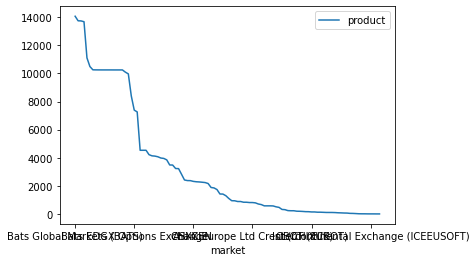

In [30]:
grouped = symbols.groupby("market")

count = grouped[["product"]].count()
count = count.sort_values(by="product", ascending=False)

count.plot()

print(count.head(10))

In [53]:
idx = 0
market = count.index[idx]
print("market=", market)
mask = symbols["market"] == market
symbols_tmp = symbols[mask]

grouped = symbols_tmp.groupby("product")

grouped[["product"]].count()

market= MIAX PEARL


,product
product,
ETFs,13749


In [51]:
pd.set_option("display.max_colwidth", 100)

In [52]:
symbols_tmp[["product", "url"]]

,product,url
255724,ETFs,https://ndcdyn.interactivebrokers.com/en/index.php?f=2222&exch=bats&showcategories=WAR
255725,ETFs,https://ndcdyn.interactivebrokers.com/en/index.php?f=2222&exch=bats&showcategories=WAR
255726,ETFs,https://ndcdyn.interactivebrokers.com/en/index.php?f=2222&exch=bats&showcategories=WAR
255727,ETFs,https://ndcdyn.interactivebrokers.com/en/index.php?f=2222&exch=bats&showcategories=WAR
255728,ETFs,https://ndcdyn.interactivebrokers.com/en/index.php?f=2222&exch=bats&showcategories=WAR
...,...,...
338416,ETFs,https://ndcdyn.interactivebrokers.com/en/index.php?f=2222&exch=bats&showcategories=STK&p=&cc=&li...
338417,ETFs,https://ndcdyn.interactivebrokers.com/en/index.php?f=2222&exch=bats&showcategories=STK&p=&cc=&li...
338418,ETFs,https://ndcdyn.interactivebrokers.com/en/index.php?f=2222&exch=bats&showcategories=STK&p=&cc=&li...
338419,ETFs,https://ndcdyn.interactivebrokers.com/en/index.php?f=2222&exch=bats&showcategories=STK&p=&cc=&li...


In [43]:
symbols_tmp["url"].values

array(['https://ndcdyn.interactivebrokers.com/en/index.php?f=2222&exch=bats&showcategories=WAR',
       'https://ndcdyn.interactivebrokers.com/en/index.php?f=2222&exch=bats&showcategories=WAR',
       'https://ndcdyn.interactivebrokers.com/en/index.php?f=2222&exch=bats&showcategories=WAR',
       ...,
       'https://ndcdyn.interactivebrokers.com/en/index.php?f=2222&exch=bats&showcategories=STK&p=&cc=&limit=100&page=97',
       'https://ndcdyn.interactivebrokers.com/en/index.php?f=2222&exch=bats&showcategories=STK&p=&cc=&limit=100&page=97',
       'https://ndcdyn.interactivebrokers.com/en/index.php?f=2222&exch=bats&showcategories=STK&p=&cc=&limit=100&page=97'],
      dtype=object)